# Analysis and insights Python script: Retail market analysis in Madrid
## Part 1: Gathering the data and creating a database

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa
import folium

## Gather data

### Airbnb data
The airbnb data is obtained through the following website:
[www.insiderairbnb.com](http://insideairbnb.com/get-the-data/)

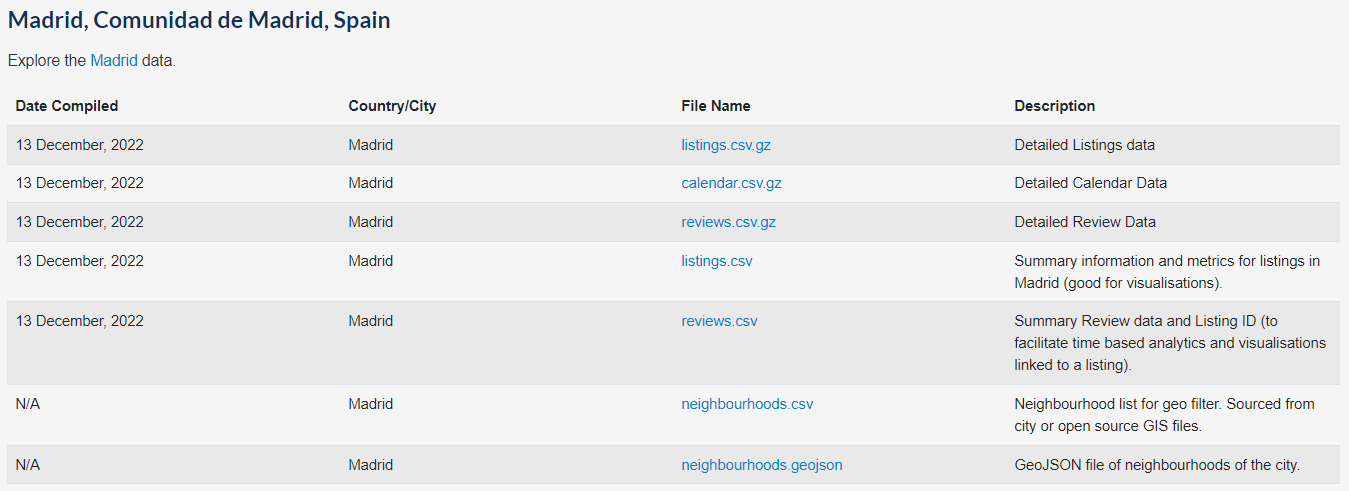

In [2]:
from IPython import display
display.Image("images/airbnb_madrid.png")

There are different data files available for download. For the sake of this project only "listings.csv.gz" and "listings.csv" are used. The other files provide more info about reviews, which could be interesting for doing a sentiment analysis in a different project.

Let's open the aforementioned data files:
### listings.csv

In [3]:
listings = pd.read_csv("data/listings.csv")
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,90,4,102,2022-11-29,0.66,1,61,18,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.33,2,346,0,NaN
2,24805,Gran Via Studio Madrid,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,25,2022-10-16,0.26,1,73,10,NaN
3,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,173,2022-11-23,1.13,1,345,19,NaN
4,37921,Piso barrio de salamanca,162926,Sergio,Salamanca,Recoletos,40.42325,-3.68281,Private room,20,3,0,NaN,NaN,1,291,0,NaN


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20776 entries, 0 to 20775
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20776 non-null  int64  
 1   name                            20772 non-null  object 
 2   host_id                         20776 non-null  int64  
 3   host_name                       20773 non-null  object 
 4   neighbourhood_group             20776 non-null  object 
 5   neighbourhood                   20776 non-null  object 
 6   latitude                        20776 non-null  float64
 7   longitude                       20776 non-null  float64
 8   room_type                       20776 non-null  object 
 9   price                           20776 non-null  int64  
 10  minimum_nights                  20776 non-null  int64  
 11  number_of_reviews               20776 non-null  int64  
 12  last_review                     

Conclusions:

- The listings file contains all the useful information we need to carry out the project.

### listings.csv.gz

In [5]:
listings_det = pd.read_csv("data/listings.csv.gz")
listings_det.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20221213034110,2022-12-13,city scrape,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.86,4.83,4.86,NaN,f,1,0,1,0,0.66
1,21853,https://www.airbnb.com/rooms/21853,20221213034110,2022-12-13,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.33
2,24805,https://www.airbnb.com/rooms/24805,20221213034110,2022-12-13,city scrape,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,5.00,5.00,4.80,NaN,f,1,1,0,0,0.26
3,30959,https://www.airbnb.com/rooms/30959,20221213034110,2022-12-13,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.09
4,37921,https://www.airbnb.com/rooms/37921,20221213034110,2022-12-13,city scrape,Piso barrio de salamanca,<b>The space</b><br />Piso de 3 habitaciones y...,NaN,https://a0.muscache.com/pictures/0fcae836-71d3...,162926,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [6]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20776 entries, 0 to 20775
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20776 non-null  int64  
 1   listing_url                                   20776 non-null  object 
 2   scrape_id                                     20776 non-null  int64  
 3   last_scraped                                  20776 non-null  object 
 4   source                                        20776 non-null  object 
 5   name                                          20772 non-null  object 
 6   description                                   20117 non-null  object 
 7   neighborhood_overview                         11429 non-null  object 
 8   picture_url                                   20775 non-null  object 
 9   host_id                                       20776 non-null 

Conclusions:

- This file contains the same records than listings but with more columns.
- We can join it with listings by "id" field.

## Creating the database
### We are going to store all the data in a database using SQLite.
Create the connection to the database, create the tables and load them to the database.

In [7]:
con = sa.create_engine("sqlite:///data/airbnb.db")

listings.to_sql("listings", con=con, if_exists="replace")
listings_det.to_sql("listings_det", con=con, if_exists="replace")